In [1]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List


# COCO

20048


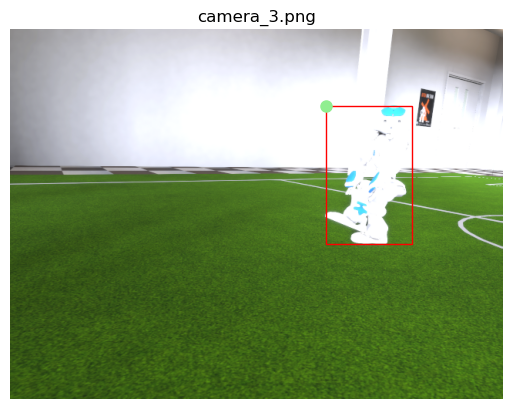

1311


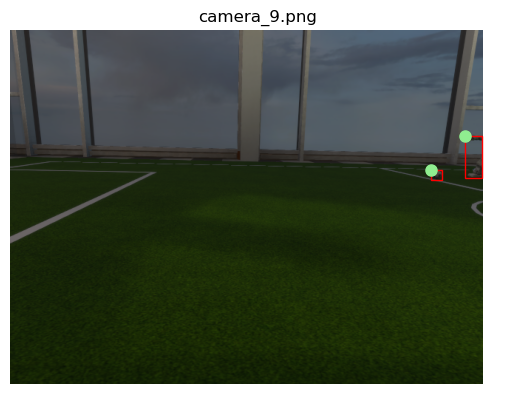

1189


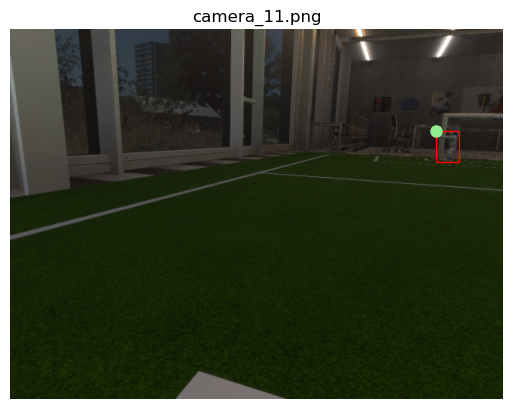

1938


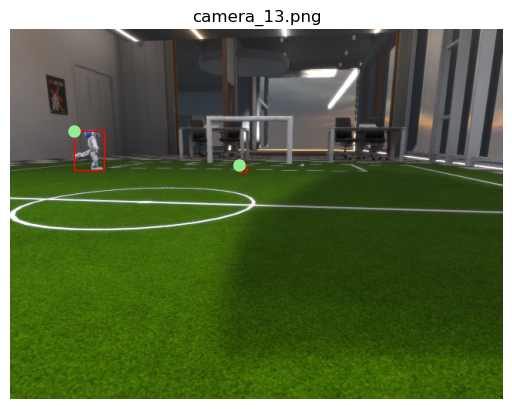

16159


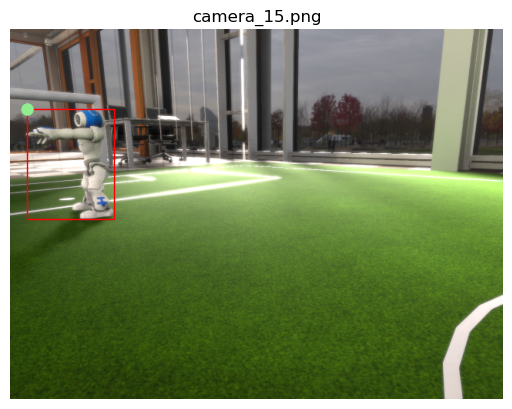

16159


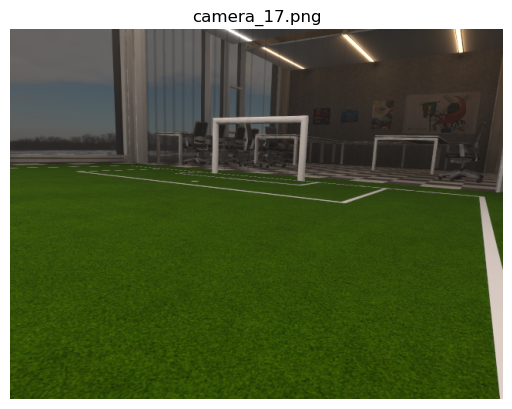

In [2]:
def visualize_bounding_boxes_coco(json_file_path: str, image_dir_path: str, image_ids: List[int]) -> None:
    """
    Visualize bounding boxes on images in COCO format.

    Args:
        json_file_path (str): Path to the COCO JSON file.
        image_dir_path (str): Path to the directory containing the images.
        image_ids (List[int]): List of image IDs to visualize.

    Returns:
        None
    """
    # Load COCO JSON file
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

    # Iterate over images in the COCO dataset
    for image_info in data['images']:
        image_id = image_info['id']
        if image_id not in image_ids:
            continue

        # Get image file name and path
        image_file_name = image_info['file_name']
        image_path = os.path.join(image_dir_path, image_file_name)

        # Open and display the image
        image = Image.open(image_path)
        plt.imshow(image)

        # Iterate over annotations to find bounding boxes for the image
        for annotation in data['annotations']:
            if annotation['image_id'] == image_id:
                bbox = annotation['bbox']
                tl_x, tl_y, w, h = bbox

                # Create a rectangle patch for the bounding box
                rectangle = patches.Rectangle((tl_x, tl_y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                plt.gca().add_patch(rectangle)

                # Add top left dot as a visual reference
                plt.plot(tl_x, tl_y, 'o', markersize=8, color='lightgreen')

        print( w * h)
        plt.title(image_file_name)
        plt.axis('off')
        plt.show()

# Example usage:
json_file_path = 'data/coco_nao/bbox.json'
image_dir_path = 'data/coco_nao/images'
image_ids = [3, 9, 11, 13, 15, 17]  # List of image IDs to visualize

visualize_bounding_boxes_coco(json_file_path, image_dir_path, image_ids)


# YOLO

In [26]:
def visualize_bounding_boxes_yolo(image_ids: List[int], image_dir_path: str, yolo_txt_dir: str) -> None:
    """
    Visualize bounding boxes in YOLO format.

    Args:
        image_ids (List[int]): List of image IDs to visualize.
        image_dir_path (str): Path to the directory containing the images.
        yolo_txt_dir (str): Path to the directory containing the YOLO text files.

    Returns:
        None
    """
    # Iterate over the image IDs
    for image_id in image_ids:
        image_file_name = f"camera_{image_id}.png"
        image_path = os.path.join(image_dir_path, image_file_name)
        yolo_txt_file = f"camera_{image_id}.txt"
        yolo_txt_path = os.path.join(yolo_txt_dir, yolo_txt_file)

        # Open and display the image
        image = Image.open(image_path)
        plt.imshow(image)

   

        # Read the YOLO text file
        with open(yolo_txt_path, 'r') as txt_file:
            lines = txt_file.readlines()

        # Iterate over bounding box annotations in the YOLO text file
        for line in lines:
            bbox = line.split()
            bbox = [float(value) for value in bbox]  # Convert bbox values to float
            _, x_center, y_center, width, height = bbox

            # Calculate the coordinates of the bounding box
            x = (x_center - width / 2) * image.width
            y = (y_center - height / 2) * image.height
            w = width * image.width
            h = height * image.height

            # Create a rectangle patch for the bounding box
            rectangle = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

            print(w * h)


            plt.gca().add_patch(rectangle)

            # Add the center dot as a visual reference
            plt.plot(x_center * image.width, y_center * image.height, 'o', markersize=8, color='lightgreen')

        plt.title(image_file_name)
        plt.axis('off')
        plt.show()

# Example usage:
image_ids = [3, 9]  # List of image IDs to visualize
image_dir_path = 'data/coco_nao/filtered_images'
yolo_txt_dir = 'data/coco_nao/labels'

visualize_bounding_boxes_yolo(image_ids, image_dir_path, yolo_txt_dir)


FileNotFoundError: [Errno 2] No such file or directory: 'data/coco_nao/filtered_images/camera_3.png'

In [29]:
def visualize_bounding_boxes_yolo_raw(image_dir_path: str, yolo_txt_dir: str) -> None:
    """
    Visualize bounding boxes in YOLO format.

    Args:
        image_dir_path (str): Path to the directory containing the images.
        yolo_txt_dir (str): Path to the directory containing the YOLO text files.

    Returns:
        None
    """
    image_files = os.listdir(image_dir_path)[:5]

    for image_file_name in image_files:
        image_file_path = os.path.join(image_dir_path, image_file_name)
        # Read image file
        image = Image.open(image_file_path)
        # Read corresponding YOLO text file
        txt_file_name = os.path.splitext(image_file_name)[0] + '.txt'
        txt_file_path = os.path.join(yolo_txt_dir, txt_file_name)

        with open(txt_file_path, 'r') as txt_file:
            lines = txt_file.readlines()
        
        # print image res
        print(image.size)
        plt.imshow(image)

        # Iterate over bounding box annotations in the YOLO text file
        for line in lines:
            bbox = line.split()
            bbox = [float(value) for value in bbox]  # Convert bbox values to float
            cat, x_center, y_center, width, height = bbox

            if (cat != 1):
                continue
            # Calculate the coordinates of the bounding box
            x = (x_center - width / 2) * image.width
            y = (y_center - height / 2) * image.height
            w = width * image.width
            h = height * image.height

            # Create a rectangle patch for the bounding box
            rectangle = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

            plt.gca().add_patch(rectangle)

            # Add the center dot as a visual reference
            plt.plot(x_center * image.width, y_center * image.height, 'o', markersize=8, color='lightgreen')

        plt.title(image_file_name)
        plt.axis('off')
        plt.show()


(640, 480)


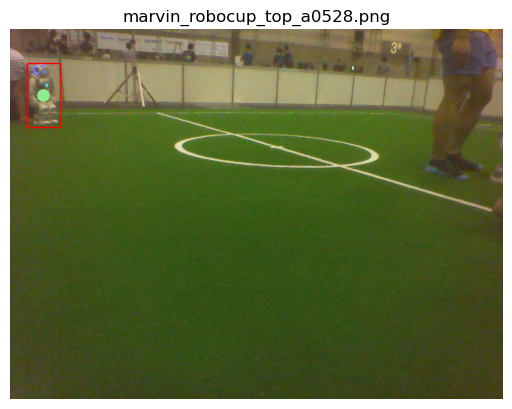

(640, 480)


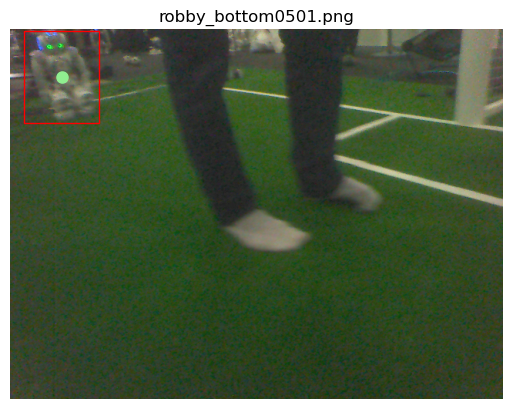

(640, 480)


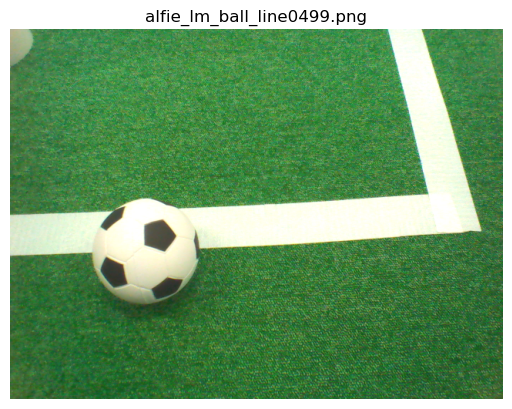

(640, 480)


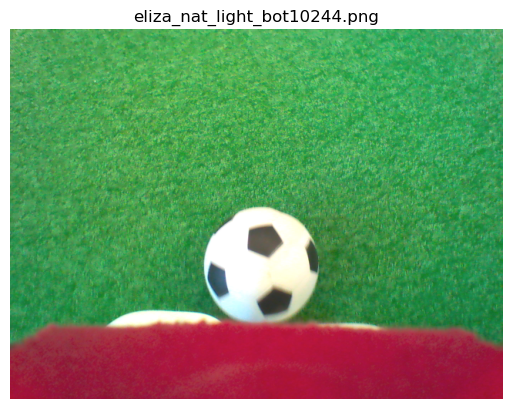

(640, 480)


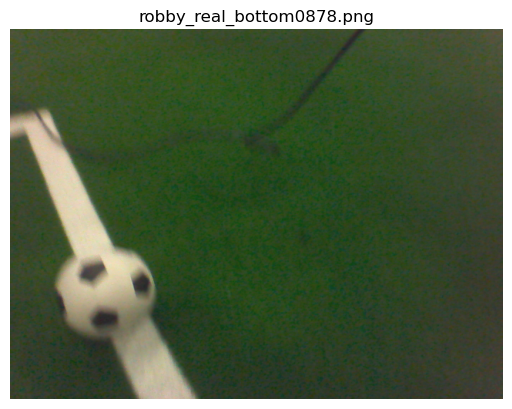

In [30]:
image_dir_path = "data/raw/test/images"
yolo_txt_dir = "data/raw/test/labels"

visualize_bounding_boxes_yolo_raw(image_dir_path, yolo_txt_dir)


# Data maken

In [ ]:
import os
import json
import random
from PIL import Image
from torchvision.transforms import functional as F

def extract_zoomed_images(image_dir, coco_json_file, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Load COCO JSON file
    with open(coco_json_file, 'r') as f:
        coco_data = json.load(f)

    images = coco_data['images']

    for image_info in images:
        image_id = image_info['id']
        file_name = f"camera_{image_id}.png"
        image_path = os.path.join(image_dir, file_name)

        # Load the image using PIL
        image = Image.open(image_path)

        # Find corresponding annotations for the image
        annotations = [annotation for annotation in coco_data['annotations'] if annotation['image_id'] == image_id]

        for annotation in annotations:
            bbox = annotation['bbox']
            x, y, w, h = bbox

            # Calculate zoomed region based on jaccard index
            jaccard_index = random.uniform(0.1, 0.9)
            zoomed_w = int(w * jaccard_index)
            zoomed_h = int(h * jaccard_index)
            zoomed_x = random.randint(x, x + w - zoomed_w)
            zoomed_y = random.randint(y, y + h - zoomed_h)

            # Extract zoomed region from the image
            zoomed_region = image.crop((zoomed_x, zoomed_y, zoomed_x + zoomed_w, zoomed_y + zoomed_h))

            # Save the zoomed-in variant with the same file name in the output directory
            zoomed_file_name = f"zoomed_{jaccard_index}_{file_name}"
            zoomed_file_path = os.path.join(output_dir, zoomed_file_name)
            zoomed_region.save(zoomed_file_path)

            # Update COCO JSON with new image entry for the zoomed-in variant
            zoomed_image_info = {
                'id': len(images) + 1,
                'width': zoomed_w,
                'height': zoomed_h,
                'file_name': zoomed_file_name
            }
            images.append(zoomed_image_info)

            # Update annotation bounding box coordinates for the zoomed-in variant
            annotation['bbox'] = [0, 0, zoomed_w, zoomed_h]
            annotation['image_id'] = zoomed_image_info['id']

    # Save the updated COCO JSON file
    new_coco_json_file = os.path.join(output_dir, 'zoomed_' + os.path.basename(coco_json_file))
    with open(new_coco_json_file, 'w') as f:
        json.dump(coco_data, f, indent=4)

    print("Zoomed-in images extraction completed!")

# Example usage
image_directory = '/data/coco_nao/train/images'
coco_json_file = '/data/coco_nao/bbox.json'
output_directory = '/data/coco_nao/zoomed'
extract_zoomed_images(image_directory, coco_json_file, output_directory)


OSError: [Errno 30] Read-only file system: '/data'